In [41]:
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd


import numpy as np

matplotlib.rcParams.update({'font.size': 14})

In [42]:
data_size = 2 * 1024 * 8 # 2MB

time_quic = [154.942, 171.2205, 226.268, 278.151, 332.046, 370.8225]
time_default = [154.942, 155.284, 210.2895, 275.2215, 318.503, 385.0085]

thoughput_quic = [data_size / time for time in time_quic]
thoughput_default = [data_size / time for time in time_default]

In [43]:
print(thoughput_quic)
print(thoughput_default)

[105.74279407778394, 95.68947643535675, 72.4097088408436, 58.903257583111326, 49.34256097046795, 44.18286376905393]
[105.74279407778394, 105.50990443316762, 77.91164085700903, 59.53023292148325, 51.44064577099745, 42.55490463197565]


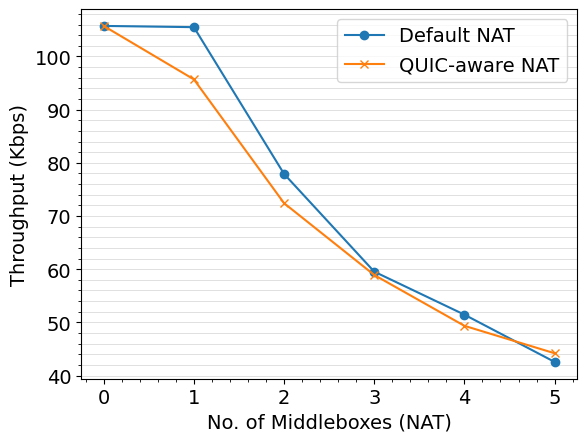

In [44]:
plt.xlabel('No. of Middleboxes (NAT)') 
plt.ylabel('Throughput (Kbps)') 
  
# plt.title('CDF of Default NAT and QUIC-aware NAT') 
x = [0, 1, 2, 3, 4, 5]  
plt.xticks(x)
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='lightgrey', axis='y')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey', axis='y')
plt.plot(x, thoughput_default, marker='o') 
plt.plot(x, thoughput_quic, marker='x')
plt.legend(["Default NAT", "QUIC-aware NAT"])
plt.savefig('throughput_nat.pdf',bbox_inches='tight', dpi=150)

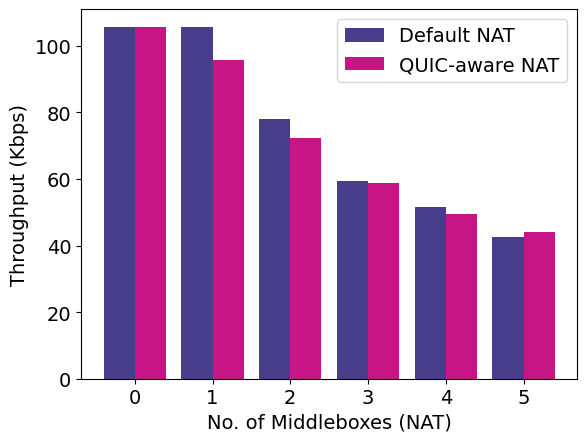

In [45]:
  
x = [0, 1, 2, 3, 4, 5]  

fig, ax = plt.subplots()

ax.set_xlabel('No. of Middleboxes (NAT)') 
ax.set_ylabel('Throughput (Kbps)') 

fields = ["Default NAT", "QUIC-aware NAT"]

width = 0.4  # the width of the bars
multiplier = 0

f = {
    "Default NAT": thoughput_default,
    "QUIC-aware NAT": thoughput_quic
}

colors = {
    "Default NAT": "darkslateblue",
    "QUIC-aware NAT": "mediumvioletred"

}

for attribute, measurement in f.items():
    offset = width * multiplier
    x1 = [ _x + offset for _x in x]
    rects = ax.bar(x1, measurement, width, label=attribute, color=colors[attribute])
    # ax.errorbar(x + offset, measurement, e[attribute], fmt='o', color='r', lw=1, capsize=4, capthick=1)
    # plt.bar_label(rects, padding=3)
    multiplier += 1

ax.legend(loc="upper right")

x_offset = [_x + (width/2) for _x in x]
ax.set_xticks(x_offset, x)

fig.savefig('throughput_nat.pdf',bbox_inches='tight', dpi=150)
